In [1]:
import os,re
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.optimize import least_squares

In [9]:
a = np.array([0,1,4,5,7])
b = np.array([0,1,2,3,4,6])
np.array([b[i] for i in a if i < len(b)])

array([0, 1, 4, 6])

In [2]:
bound_complex= np.array([23,25,26,34,35,41,42,45,46,47])-1
def Reading_log_file(log_file,t):
    bound_complex_time = []
    with open(log_file, "r") as file:
        capture = False  # Flag to start capturing data
        for line in file:
            if "Loop time" in line:
                break  # Stop reading when "Loop time" is encountered
            if "Time" in line and "Naccept" in line and "Nreject" in line:
                capture = True  # Start capturing from this line onwards
                continue  # Skip header line
            if capture:
                values = re.split(r'\s+', line.strip())  # Split line into values
                int_data = list(map(lambda x: int(float(x)), values))
                init_data = np.array(int_data[6:])
                sublist = np.array([init_data[i] for i in bound_complex if i < len(init_data)])
                bound_complex_time.append(sublist.sum())
    return bound_complex_time[t]
def species_dist(folder_path,t):
    bound_complex_time = []
    for i in range(1000):
        file_path = f'{folder_path}/Out_files/log.spparks_{i}'
        bound_complex_time.append(Reading_log_file(file_path,t))
    return np.array(bound_complex_time)

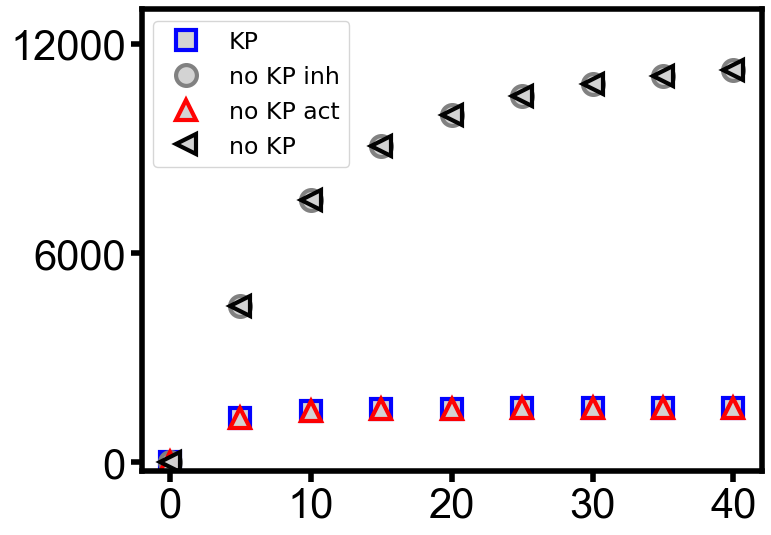

array([[    0.   ,  1264.304,  1464.09 ,  1521.349,  1540.934,  1550.037,
         1554.972,  1559.226,  1561.834],
       [    0.   ,  4477.099,  7512.473,  9081.482,  9970.356, 10513.171,
        10860.55 , 11091.486, 11249.475],
       [    0.   ,  1264.9  ,  1466.09 ,  1520.399,  1539.903,  1549.483,
         1555.354,  1559.58 ,  1561.545],
       [    0.   ,  4478.476,  7517.08 ,  9085.331,  9971.922, 10513.872,
        10861.995, 11092.324, 11249.58 ]])

In [11]:
current_path = os.getcwd()
Kp_condns = ['Kp_Both','No_Kp_Inh','No_Kp_Act','No_Kp']
clus_conds = ['Disjoint','Overlap']
HLA_condns = ['Low_HLA','High_HLA']
at_time_avg_bound_complex = []
at_time = np.arange(0,45,5)
for Kp_condn in Kp_condns:
    avg_bound_complex = []
    for t in at_time:
        file_path = f'{current_path}/{Kp_condn}/{clus_conds[0]}/{HLA_condns[0]}/Ulbp_40'
        bound_complex_time = species_dist(file_path,t)
        avg_bound_complex.append(bound_complex_time.mean())
    at_time_avg_bound_complex.append(avg_bound_complex)
plt.figure(figsize=(8,6))
plt.rcParams['axes.linewidth'] = 4
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=4)
lss = [(0,(1,0)),(0, (1, 0)), (0,(1,0)), (0, (3, 1, 1, 1))]
m_size = 15
lw = 4.0
markers = ['s','o','^','<']
colors = ['blue','gray','red','black']
Kp_condns = ['KP','no KP inh','no KP act','no KP']
def Plotting(ARL,mean_pVav,marker,ls,color,cond):
    plt.errorbar(
        ARL, mean_pVav,
        fmt=marker, markersize=m_size, markerfacecolor='lightgray',
        markeredgewidth=3.0, markeredgecolor=color,
        elinewidth=3.5, capsize=10, capthick=20,
        ecolor=color, alpha=0.99, 
        color=color, label=cond)
for i in range(4):
    Plotting(at_time,np.array(at_time_avg_bound_complex[i]),markers[i],lss[0],colors[i],cond = f'{Kp_condns[i]}')
t_size =30
plt.xticks([0,10,20,30,40],fontname="Arial",fontsize = t_size)
plt.yticks([0,6000,12000],fontname="Arial",fontsize = t_size)
plt.ylim(-250.0,13000)
plt.legend(bbox_to_anchor=(0.0, 1),fontsize=17, loc='upper left')
plt.savefig(f'{clus_conds[0]}_Low_HLA_mean_Bound_SHP_vs_time.png')
plt.show()
np.array(at_time_avg_bound_complex)

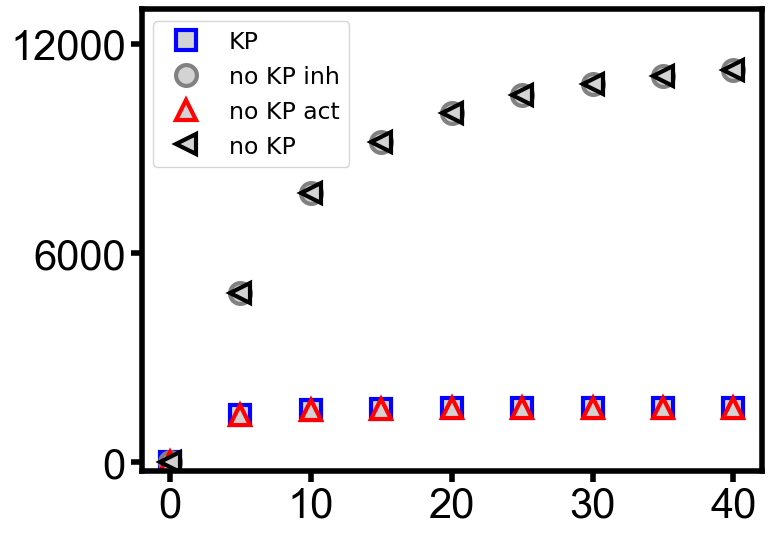

array([[    0.   ,  1363.035,  1504.397,  1538.912,  1551.029,  1556.764,
         1561.304,  1560.862,  1566.422],
       [    0.   ,  4855.104,  7714.491,  9173.959, 10006.679, 10523.668,
        10857.73 , 11083.558, 11239.789],
       [    0.   ,  1361.698,  1505.655,  1538.472,  1549.501,  1556.226,
         1560.637,  1561.601,  1563.69 ],
       [    0.   ,  4854.42 ,  7714.705,  9173.288, 10006.17 , 10521.635,
        10858.027, 11083.698, 11239.712]])

In [12]:
current_path = os.getcwd()
Kp_condns = ['Kp_Both','No_Kp_Inh','No_Kp_Act','No_Kp']
clus_conds = ['Disjoint','Overlap']
HLA_condns = ['Low_HLA','High_HLA']
at_time_avg_bound_complex = []
at_time = np.arange(0,45,5)
for Kp_condn in Kp_condns:
    avg_bound_complex = []
    for t in at_time:
        file_path = f'{current_path}/{Kp_condn}/{clus_conds[1]}/{HLA_condns[0]}/Ulbp_40'
        bound_complex_time = species_dist(file_path,t)
        avg_bound_complex.append(bound_complex_time.mean())
    at_time_avg_bound_complex.append(avg_bound_complex)
plt.figure(figsize=(8,6))
plt.rcParams['axes.linewidth'] = 4
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=4)
lss = [(0,(1,0)),(0, (1, 0)), (0,(1,0)), (0, (3, 1, 1, 1))]
m_size = 15
lw = 4.0
markers = ['s','o','^','<']
colors = ['blue','gray','red','black']
Kp_condns = ['KP','no KP inh','no KP act','no KP']
def Plotting(ARL,mean_pVav,marker,ls,color,cond):
    plt.errorbar(
        ARL, mean_pVav,
        fmt=marker, markersize=m_size, markerfacecolor='lightgray',
        markeredgewidth=3.0, markeredgecolor=color,
        elinewidth=3.5, capsize=10, capthick=20,
        ecolor=color, alpha=0.99, 
        color=color, label=cond)
for i in range(4):
    Plotting(at_time,np.array(at_time_avg_bound_complex[i]),markers[i],lss[0],colors[i],cond = f'{Kp_condns[i]}')
t_size =30
plt.xticks([0,10,20,30,40],fontname="Arial",fontsize = t_size)
plt.yticks([0,6000,12000],fontname="Arial",fontsize = t_size)
plt.ylim(-250.0,13000)
plt.legend(bbox_to_anchor=(0.0, 1),fontsize=17, loc='upper left')
plt.savefig(f'{clus_conds[1]}_Low_HLA_mean_Bound_SHP_vs_time.png')
plt.show()
np.array(at_time_avg_bound_complex)